JSON mini project

Question 1: find the 10 Countries with most projects.

In [27]:
%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# load json data as string and print keys.
json_string=json.load((open('world_bank_projects.json')))
json_string[0].keys()

dict_keys(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline', 'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode', 'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty', 'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt', 'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4', 'prodlinetext', 'productlinetype', 'regionname', 'status', 'country_namecode', 'envassesmentcategorycode', 'project_abstract', 'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype', 'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3', 'majorsector_percent', 'board_approval_month', 'theme_namecode', 'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt', 'sector_namecode', '_id'])

In [29]:
json_string[0]

{'sector': [{'Name': 'Primary education'},
  {'Name': 'Secondary education'},
  {'Name': 'Public administration- Other social services'},
  {'Name': 'Tertiary education'}],
 'supplementprojectflg': 'N',
 'projectfinancialtype': 'IDA',
 'prodline': 'PE',
 'mjtheme': ['Human development'],
 'idacommamt': 130000000,
 'impagency': 'MINISTRY OF EDUCATION',
 'project_name': 'Ethiopia General Education Quality Improvement Project II',
 'mjthemecode': '8,11',
 'closingdate': '2018-07-07T00:00:00Z',
 'totalcommamt': 130000000,
 'id': 'P129828',
 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
  {'code': 'EX', 'name': 'Education'},
  {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
  {'code': 'EX', 'name': 'Education'}],
 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
 'sector1': {'Percent': 46, 'Name': 'Primary education'},
 'lendinginstr': 'Investment Project Financing',
 'countrycode': 'ET',
 'sector2': {'Percent': 26

In [30]:
# load as Pandas dataframe and show info.
json_df = pd.read_json('world_bank_projects.json')
#json_df.head()
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [31]:
# Select only columns that have Country and project information. 
# The 'countryname' and 'project_name' don't have any missing values.
country_proj_cols=[key for key in json_string[0].keys() if ('country' in key) | ('regionname' in key) | ('project' in key)]
#country_proj_cols
country_cols=[key for key in json_string[0].keys() if ('country' in key) | ('regionname' in key)]
country_proj_df=json_df[country_proj_cols].drop(['projectdocs','project_abstract'],axis=1)
country_proj_df.head()

,supplementprojectflg,projectfinancialtype,project_name,countrycode,countryshortname,regionname,country_namecode,lendprojectcost,countryname,projectstatusdisplay
0,N,IDA,Ethiopia General Education Quality Improvement...,ET,Ethiopia,Africa,Federal Democratic Republic of Ethiopia!$!ET,550000000,Federal Democratic Republic of Ethiopia,Active
1,N,OTHER,TN: DTF Social Protection Reforms Support,TN,Tunisia,Middle East and North Africa,Republic of Tunisia!$!TN,5700000,Republic of Tunisia,Active
2,Y,IDA,Tuvalu Aviation Investment Project - Additiona...,TV,Tuvalu,East Asia and Pacific,Tuvalu!$!TV,6060000,Tuvalu,Active
3,N,OTHER,Gov't and Civil Society Organization Partnership,RY,"Yemen, Republic of",Middle East and North Africa,Republic of Yemen!$!RY,1500000,Republic of Yemen,Active
4,N,IDA,Second Private Sector Competitiveness and Econ...,LS,Lesotho,Africa,Kingdom of Lesotho!$!LS,15000000,Kingdom of Lesotho,Active


In [32]:
#Check for duplicates. If found, more columns will be condidered.
dup=country_proj_df[country_proj_df.duplicated()]
dup

,supplementprojectflg,projectfinancialtype,project_name,countrycode,countryshortname,regionname,country_namecode,lendprojectcost,countryname,projectstatusdisplay


In [33]:
# Find number of project by grouping.
gr_bycountry=country_proj_df.groupby('countryname')
gr_bycountry.size().sort_values(ascending=False).head(10)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64

In [34]:
# The presence of Africa as Country is weird. The data is further analyzed.
country_proj_df.groupby(['countryshortname']).size().sort_values(ascending=False).head(10)

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
dtype: int64

In [35]:
africa=country_proj_df[country_proj_df.countryname=='Africa'][country_cols]
africa

,countrycode,countryshortname,regionname,country_namecode,countryname
45,3A,Africa,Africa,Africa!$!3A,Africa
46,3A,Africa,Africa,Africa!$!3A,Africa
51,3A,Africa,Africa,Africa!$!3A,Africa
58,3A,Africa,Africa,Africa!$!3A,Africa
65,3A,Africa,Africa,Africa!$!3A,Africa
99,3A,Africa,Africa,Africa!$!3A,Africa
167,3A,Africa,Africa,Africa!$!3A,Africa
184,3A,Africa,Africa,Africa!$!3A,Africa
287,3A,Africa,Africa,Africa!$!3A,Africa
353,3A,Africa,Africa,Africa!$!3A,Africa


In [36]:
print(json_df.regionname.unique())

['Africa' 'Middle East and North Africa' 'East Asia and Pacific'
 'South Asia' 'Europe and Central Asia' 'Latin America and Caribbean'
 'Other']


In [37]:
# It's possible that Countries that are not part of the 'Middle East and North Africa' are classified as Africa
# although this isn't the case for Mozambico.
moz=country_proj_df[country_proj_df.countryname=='Republic of Mozambique'][country_cols]
moz

,countrycode,countryshortname,regionname,country_namecode,countryname
29,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
74,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
83,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
84,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
229,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
230,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
231,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
254,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
255,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique
335,MZ,Mozambique,Africa,Republic of Mozambique!$!MZ,Republic of Mozambique


In [38]:
# Since the question asks for top 10 Countries, the entries containing Africa as a Country name are removed. 
# In terms of projects, they only represent about 2% of the entries, and overall appear at the bottom of the top 10.
new_df=country_proj_df[country_proj_df.countryname!='Africa']
new_df.shape

(489, 10)

In [39]:
newgr_bycountry=new_df.groupby('countryname')
new_top10=newgr_bycountry.size().sort_values(ascending=False).head(10)
new_top10

countryname
Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Burkina Faso                        9
dtype: int64

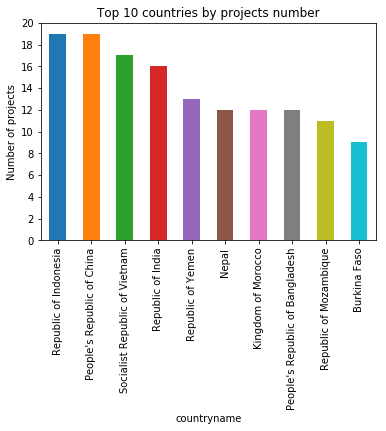

In [40]:
new_top10.plot(kind='bar')
plt.title('Top 10 countries by projects number')
plt.ylabel('Number of projects')
#plt.ylim([0,20])
plt.yticks(np.arange(0,22,2))
plt.show() 

Question 2: find the top 10 major project themes (using column 'mjtheme_namecode')

In [41]:
# The 'mjtheme_namecode' is a dictionary, so the Json normalize function is used to extract keys, values.
cols=['countryname', 'projectfinancialtype', 'project_name','lendprojectcost', 'projectstatusdisplay']
norm=json_normalize(json_string,'mjtheme_namecode',cols)
norm.head(10)

,code,name,countryname,projectfinancialtype,project_name,lendprojectcost,projectstatusdisplay
0,8,Human development,Federal Democratic Republic of Ethiopia,IDA,Ethiopia General Education Quality Improvement...,550000000,Active
1,11,,Federal Democratic Republic of Ethiopia,IDA,Ethiopia General Education Quality Improvement...,550000000,Active
2,1,Economic management,Republic of Tunisia,OTHER,TN: DTF Social Protection Reforms Support,5700000,Active
3,6,Social protection and risk management,Republic of Tunisia,OTHER,TN: DTF Social Protection Reforms Support,5700000,Active
4,5,Trade and integration,Tuvalu,IDA,Tuvalu Aviation Investment Project - Additiona...,6060000,Active
5,2,Public sector governance,Tuvalu,IDA,Tuvalu Aviation Investment Project - Additiona...,6060000,Active
6,11,Environment and natural resources management,Tuvalu,IDA,Tuvalu Aviation Investment Project - Additiona...,6060000,Active
7,6,Social protection and risk management,Tuvalu,IDA,Tuvalu Aviation Investment Project - Additiona...,6060000,Active
8,7,Social dev/gender/inclusion,Republic of Yemen,OTHER,Gov't and Civil Society Organization Partnership,1500000,Active
9,7,Social dev/gender/inclusion,Republic of Yemen,OTHER,Gov't and Civil Society Organization Partnership,1500000,Active


In [42]:
dup1=norm[norm.duplicated()]
dup1.shape
#dup.head()

(414, 7)

In [43]:
n=norm.drop_duplicates()
n.head(10)

,code,name,countryname,projectfinancialtype,project_name,lendprojectcost,projectstatusdisplay
0,8,Human development,Federal Democratic Republic of Ethiopia,IDA,Ethiopia General Education Quality Improvement...,550000000,Active
1,11,,Federal Democratic Republic of Ethiopia,IDA,Ethiopia General Education Quality Improvement...,550000000,Active
2,1,Economic management,Republic of Tunisia,OTHER,TN: DTF Social Protection Reforms Support,5700000,Active
3,6,Social protection and risk management,Republic of Tunisia,OTHER,TN: DTF Social Protection Reforms Support,5700000,Active
4,5,Trade and integration,Tuvalu,IDA,Tuvalu Aviation Investment Project - Additiona...,6060000,Active
5,2,Public sector governance,Tuvalu,IDA,Tuvalu Aviation Investment Project - Additiona...,6060000,Active
6,11,Environment and natural resources management,Tuvalu,IDA,Tuvalu Aviation Investment Project - Additiona...,6060000,Active
7,6,Social protection and risk management,Tuvalu,IDA,Tuvalu Aviation Investment Project - Additiona...,6060000,Active
8,7,Social dev/gender/inclusion,Republic of Yemen,OTHER,Gov't and Civil Society Organization Partnership,1500000,Active
10,5,Trade and integration,Kingdom of Lesotho,IDA,Second Private Sector Competitiveness and Econ...,15000000,Active


In [44]:
# The data frame just created has some missing values. For the purpose of finding the most common themes, the missing 
# values are not filled in; they will be in the answer to the next question.
n1=n[n.name!='']

In [45]:
n1.name.value_counts().head(10)

Rural development                               135
Environment and natural resources management    135
Public sector governance                        126
Human development                               118
Social protection and risk management           110
Financial and private sector development        104
Social dev/gender/inclusion                     103
Trade and integration                            56
Urban development                                37
Economic management                              28
Name: name, dtype: int64

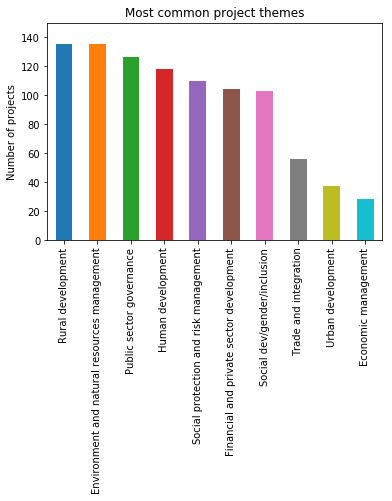

In [46]:
n1.name.value_counts().head(10).plot(kind='bar')
plt.title('Most common project themes')
plt.ylabel('Number of projects')
plt.ylim(0,150)
plt.show()

Question 3: Create a dataframe with the missing names filled in.

In [47]:
n2=n.sort_values('code')

In [48]:
nc=pd.Series()
for k in n.groupby('code').groups.keys():
    nc=nc.append(n2[n2.code==k]['name'].replace("",method='ffill').replace("",method='bfill'))
nc=nc.sort_index()
nc.head(15)


0                                Human development
1     Environment and natural resources management
2                              Economic management
3            Social protection and risk management
4                            Trade and integration
5                         Public sector governance
6     Environment and natural resources management
7            Social protection and risk management
8                      Social dev/gender/inclusion
10                           Trade and integration
11        Financial and private sector development
12           Social protection and risk management
13           Social protection and risk management
14                        Public sector governance
15        Financial and private sector development
dtype: object

In [49]:
nf=nc.to_frame('name_filled')
nf=pd.concat([n[['code','name']],nf],axis=1).drop('name',axis=1).rename(columns={'name_filled':'project_theme','code':
                                                                                'project_code'})
nf.head(10)

,project_code,project_theme
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
10,5,Trade and integration


In [50]:
nf['project_theme'].value_counts().head(10)

Environment and natural resources management    162
Rural development                               149
Public sector governance                        141
Human development                               131
Social protection and risk management           120
Financial and private sector development        120
Social dev/gender/inclusion                     114
Trade and integration                            61
Urban development                                40
Economic management                              33
Name: project_theme, dtype: int64

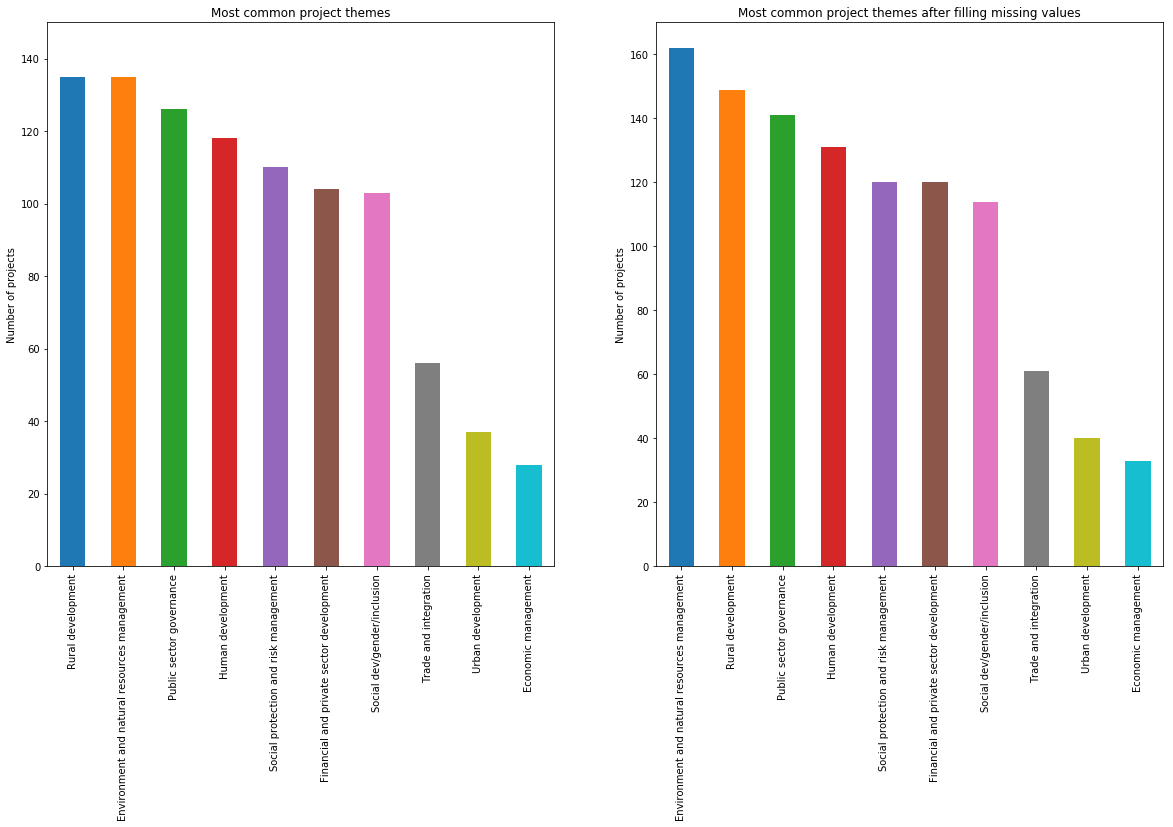

In [51]:
# The new results with the missing values filled are plotted together with the previous results.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
n1.name.value_counts().head(10).plot(kind='bar')
plt.title('Most common project themes')
plt.ylabel('Number of projects')
plt.ylim(0,150)
plt.subplot(1,2,2)
nf['project_theme'].value_counts().head(10).plot(kind='bar')
plt.title('Most common project themes after filling missing values')
plt.ylabel('Number of projects')
plt.ylim(0,170)
plt.show()

In [52]:
# The trend is confirmed after filling the missing themes. Only the top 2 are swapped.